# Solar Radiation Monitoring Laboratory (SRML) - University of Oregon

The [Solar Radiation Monitoring Laboratory (SRML)](http://solardat.uoregon.edu/index.html) at the University of Oregon has been providing [solar radiation data](http://solardat.uoregon.edu/SolarData.html) for the Northeastern United States since 1975. The SRML monitoring station network consists of both high-quality stations that measure all three irradiance components at a 1-minute resolution, as well as stations with low quality instruments that only log measurements hourly. A full list of the 42 stations (including discontinued stations) can be found on the [SRML website](http://solardat.uoregon.edu/MonitoringStations.html).

A list of the high-quality SRML stations can be retrieved from the [station listing](../station_listing):

In [8]:
import pandas as pd

df = pd.read_csv('solarstations.csv', sep=';', encoding='latin1')
df = df[df['Network'] == 'SRML']
df

,Station full name,Abbreviation,State,Country,Latitude,Longitude,Elevation,Time period,Network,Comment,URL,Tier 2,Instrument
80,Portland,NaN,Oregon,USA,45.510,-122.690,70.0,2011-,SRML,5-min data between 2004 and 2011.,http://solardat.uoregon.edu/PortlandPV.html,2,RSR
81,Burns,NaN,Oregon,USA,43.520,119.020,1265.0,2011-,SRML,5 min data from 1994 to 2011.,http://solardat.uoregon.edu/Burns.html,1,Thermopile
82,Silver lake,NaN,Oregon,USA,43.120,-121.060,1355.0,2002-,SRML,Only 5 minute data?,http://solardat.uoregon.edu/SilverLake.html,2,RSP
83,Ashland,NaN,Oregon,USA,42.190,-122.700,595.0,2018-,SRML,5-minute data from 2000 to 2018.,http://solardat.uoregon.edu/Ashland.html,2,RSP
84,Seattle,NaN,Washington,USA,47.654,-122.309,70.0,2015-,SRML,NaN,http://solardat.uoregon.edu/Seattle_UW.html,1,Thermopile


In [37]:
import folium
from folium import plugins

EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

# Create Folium map
m = folium.Map(
    location=[45, -115],
    zoom_start=5, min_zoom=3, max_bounds=True,
    control_scale=True,  # Adds distance scale in lower left corner
    tiles='openstreetmap',
)

# Add each station to the map
# Consider using apply instead of for loop to add stations in case of many stations
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station full name'] + ' - ' + str(row['State']) + ' ' + row['Country'],
        tooltip=row['Abbreviation'],
        icon=folium.Icon(color='blue', icon='bolt', prefix='fa')
    ).add_to(m)

folium.raster_layers.TileLayer(EsriImagery, name='World imagery', attr=EsriAttribution).add_to(m)
folium.LayerControl(position='topleft').add_to(m)

# Additional options and plugins
# Note it's not possible to change the position of the scale
plugins.MiniMap(toggle_display=True, position='bottomright').add_to(m)  # Add minimap to the map
plugins.Fullscreen(position='topright').add_to(m)  # Add full screen button to map
folium.LatLngPopup().add_to(m)  # Show latitude/longitude when clicking on the map
# plugins.LocateControl(position='topright').add_to(m)  # Add button for your position
# plugins.MeasureControl(position='topleft').add_to(m)  # Add distance length measurement tool

# Show the map
m 

## Data retrieval

Data from the SRML stations is stored in monthly files for each station and can be freely [downloaded](http://solardat.uoregon.edu/SelectArchivalUpdatedFormat.html) from their website. The data can also be downloaded programmatically using the [pvlib-python](https://pvlib-python.readthedocs.io) library, specifically the [`read_srml_month_from_solardat`](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.iotools.read_srml_month_from_solardat.html) function.

An example of how to download data from June 2020 from the Hermiston station is shown here:

In [16]:
import pvlib

df_he = pvlib.iotools.read_srml_month_from_solardat(
    station='HE',
    year=2020,
    month=6)

df_he.head()  # print the first 5 rows of data

,ghi_0,ghi_0_flag,dni_0,dni_0_flag,dhi_3,dhi_3_flag,ghi_2,ghi_2_flag,dni_2,dni_2_flag,...,relative_humidity_1,relative_humidity_1_flag,9151,9151_flag,wind_dir_1,wind_dir_1_flag,wind_speed_1,wind_speed_1_flag,dhi_0,dhi_0_flag
2020-06-01 00:00:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.3,12,0.0,11,172.5,11,1.3,12,0,71
2020-06-01 00:01:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.5,12,0.0,11,180.7,11,1.3,12,0,71
2020-06-01 00:02:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,128.9,11,0.4,12,0,71
2020-06-01 00:03:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.4,12,0.0,11,141.6,11,1.2,12,0,71
2020-06-01 00:04:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,186.3,11,0.8,12,0,71


Text(0, 0.5, 'DHI [W/m$^2$]')

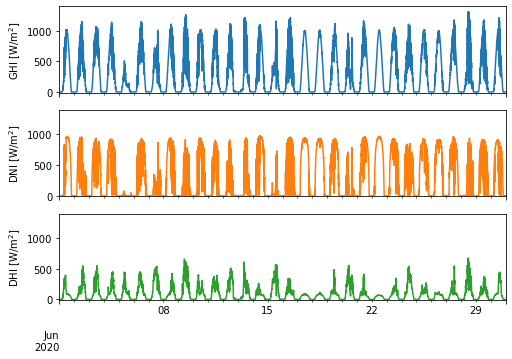

In [34]:
axes = df_he[['ghi_0','dni_0','dhi_3']].plot(
    subplots=True, legend=False, rot=0, figsize=(8,6), sharex=True, ylim=[-10,1400])

# Set ylabels
axes[0].set_ylabel('GHI [W/m$^2$]')
axes[1].set_ylabel('DNI [W/m$^2$]')
axes[2].set_ylabel('DHI [W/m$^2$]')